# Задание к лабораторной работе №8 по машинному обучению

линейная регрессия, полиномиаьная регрессия, регуляризация, логистическая регрессия

Датасет для задачи регрессии - load_diabetes

Датасет для задачи классификации - load_breast_cancer

1. Регрессия. Применить линейную (и модели с регуляризацией) и полиномиальную регрессию к датасету load_diabetes. Вывести метрики R2, MSE, MAE для двух моделей. Построить scatterplot predicted vs. true.
2. Классификация. Найти оптимальное значение параметра регуляризации $C$ с помощью LogisticRegressionCV – перебора параметров по сетке с последующей кросс-валидацией. Этот класс создан специально для логистической регрессии (для нее известны эффективные алгоритмы перебора параметров), для произвольной модели мы бы использовали GridSearchCV, RandomizedSearchCV. Построить график зависимости метрики ROC-AUC от параметра С.
3. Выбрать порог классификации для LogisticRegression на основе метрики  

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score

1.

Результаты моделей:
Линейная регрессия: R²: 0.4526, MSE: 2900.1936, MAPE: 0.3750
Полиномиальная регрессия: R²: 0.4156, MSE: 3096.0283, MAPE: 0.3829
Lasso-регрессия: R²: 0.3576, MSE: 3403.5757, MAPE: 0.4711


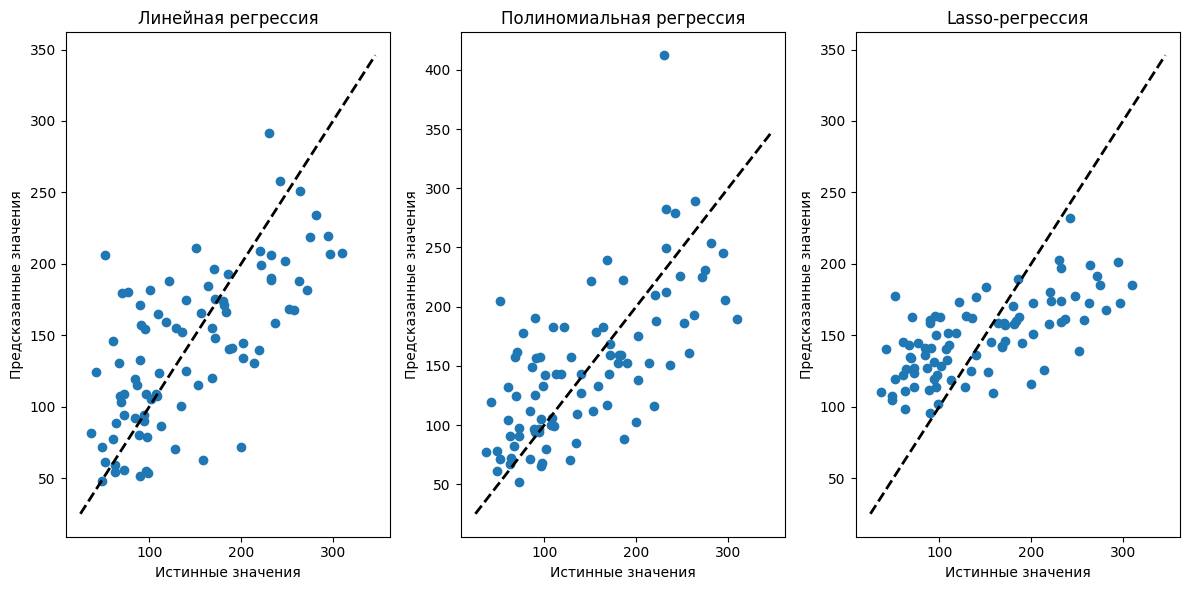

In [ ]:
# Загрузка датасета
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Линейная регрессия
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Полиномиальная регрессия (степень 2)
poly_features = PolynomialFeatures(degree=2)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)
y_pred_poly = poly_model.predict(X_poly_test)

# Lasso-регрессия
lasso_model = Lasso(alpha=1.0)  # alpha - параметр регуляризации
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

# Оценка моделей
def evaluate_model(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)  # Используем MAPE вместо MAE
    return r2, mse, mape

# Оценка линейной регрессии
r2_linear, mse_linear, mape_linear = evaluate_model(y_test, y_pred_linear)

# Оценка полиномиальной регрессии
r2_poly, mse_poly, mape_poly = evaluate_model(y_test, y_pred_poly)

# Оценка Lasso-регрессии
r2_lasso, mse_lasso, mape_lasso = evaluate_model(y_test, y_pred_lasso)

# Вывод результатов
print("Результаты моделей:")
print(f"Линейная регрессия: R²: {r2_linear:.4f}, MSE: {mse_linear:.4f}, MAPE: {mape_linear:.4f}")
print(f"Полиномиальная регрессия: R²: {r2_poly:.4f}, MSE: {mse_poly:.4f}, MAPE: {mape_poly:.4f}")
print(f"Lasso-регрессия: R²: {r2_lasso:.4f}, MSE: {mse_lasso:.4f}, MAPE: {mape_lasso:.4f}")

# Построение scatterplot для предсказанных и истинных значений
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_linear)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.title('Линейная регрессия')
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')

plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_poly)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.title('Полиномиальная регрессия')
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')

plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_lasso)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.title('Lasso-регрессия')
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')

plt.tight_layout()
plt.show()

Вывод. Для моделей с линейной и полиноминальной регрессей метрики показывают следующие результаты:
Средняя абсолютная ошибка (в процентах): наименьшее число ошибок демонстрирует линейная регрессии.
Среднеквадратичная ошибка:наименьшую ошибку допускает линейная регрессия.
R2 ошибка: наилучшие результаты демонстрирует линейная регрессия.
Дополнительно, были получены те же метрики для модели с регуляризацией: Lasso-регуляризация.

2.

Оптимальное значение C: 0.046415888336127774
Соответствующий ROC-AUC: 0.9986772486772487
ROC-AUC модели с оптимальным C: 0.9986772486772487


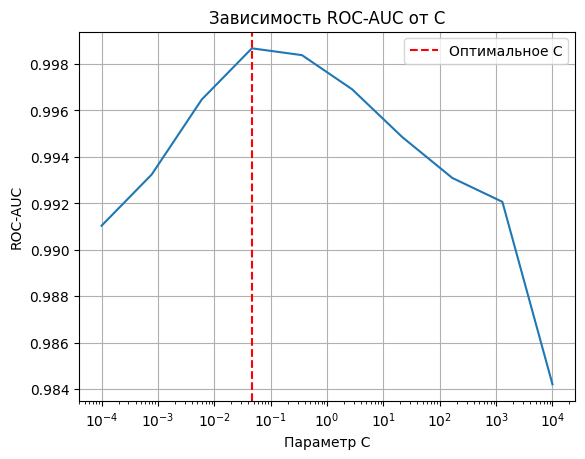

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler

# Загружаем датасет
data = load_breast_cancer()
X = data.data
y = data.target

# Масштабируем данные
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Делим на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Перебор параметров
C_values = np.logspace(-4, 4, 10)
roc_auc_scores = []

for C in C_values:
    model = LogisticRegression(C=C, max_iter=500)
    model.fit(X_train, y_train)
    y_probs = model.predict_proba(X_test)[:, 1]
    roc_auc_scores.append(roc_auc_score(y_test, y_probs))

# Определение максимального ROC-AUC и соответствующего C
optimal_idx = np.argmax(roc_auc_scores)
optimal_C = C_values[optimal_idx]
optimal_roc_auc = roc_auc_scores[optimal_idx]

print(f'Оптимальное значение C: {optimal_C}')
print(f'Соответствующий ROC-AUC: {optimal_roc_auc}')

# Обучение модели с оптимальным C
final_model = LogisticRegression(C=optimal_C, max_iter=500)
final_model.fit(X_train, y_train)
final_y_probs = final_model.predict_proba(X_test)[:, 1]
final_roc_auc = roc_auc_score(y_test, final_y_probs)

print(f'ROC-AUC модели с оптимальным C: {final_roc_auc}')

# Построение графика ROC-AUC
plt.plot(C_values, roc_auc_scores)
plt.xscale('log')
plt.xlabel('Параметр C')
plt.ylabel('ROC-AUC')
plt.title('Зависимость ROC-AUC от C')
plt.axvline(optimal_C, color='red', linestyle='--', label='Оптимальное C')
plt.grid()
plt.legend()
plt.show()

Вывод: был проведён поиск оптимального значения параметра регуляризации С для LogisticRegressionCV. Построена зависимость ROC-AUC метрики от C.

3.

In [ ]:
from sklearn.metrics import roc_curve

# Определяем вероятности
y_probs = final_model.predict_proba(X_test)[:, 1]

# Вычисляем значения ROC-кривой
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Определяем оптимальный порог по максимальной F1-мере
f1_scores = 2 * (tpr * (1 - fpr)) / (tpr + (1 - fpr))
optimal_threshold = thresholds[np.argmax(f1_scores)]

print(f'Оптимальный порог классификации: {optimal_threshold}')

Оптимальный порог классификации: 0.5553835717413417


Вывод: на основании предыдущего пункта мы взяли оптимальное значение параметра регуляризации С и с помощью F1-метрики определили оптимальный порог классификации.

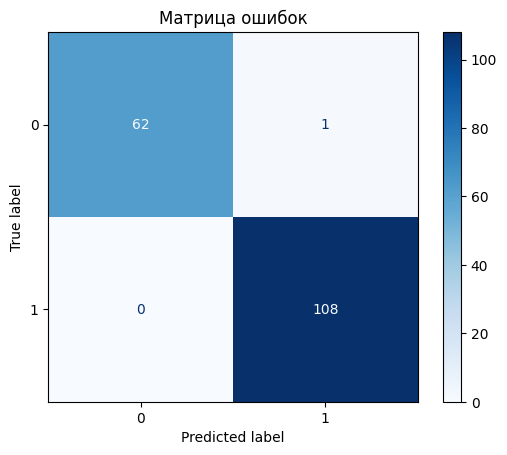

In [ ]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#Предсказания на основе оптимального порога
y_pred = (final_y_probs >= optimal_threshold).astype(int)

# Построение матрицы ошибок
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title('Матрица ошибок')
plt.show()